In [1]:
import numpy as np   
import matplotlib.pyplot as plot
%matplotlib inline

# Ambient state

In [2]:
from pycfd.reference.atmospheric_flow import stratification_profiles, saturation_calculation

ambient_stratification = stratification_profiles.Soong1973Dry()

T_e = lambda z: ambient_stratification.temp(z)
p_e = ambient_stratification.p

# Model integration

In [3]:
import odespy, numpy
from pyclouds import cloud_equations, plotting, cloud_microphysics
from pyclouds.common import Var

In [4]:
g = ambient_stratification.g
R_d = ambient_stratification.gas_properties.R()
cp_d = ambient_stratification.gas_properties.cp()

environment = ambient_stratification
constants = {'R_d': R_d, 'cp_d': cp_d, 'g': g }

In [5]:
z_points = numpy.linspace(100., 4e3, 500)

w0 = 0.05
T0 = ambient_stratification.temp(0.0) + 0.2
# r, w, T, q_v, q_r, q_l, q_i
initial_condition = Var.make_state(r=1000., w=w0, T=T0, q_v=0.012, q_l=0.0, q_i=0.0)

In [6]:
microphysics = cloud_microphysics.FiniteCondensationTimeMicrophysics()
cloud_model = cloud_equations.FullThermodynamicsCloudEquations(environment=environment, gamma=1.0, D=0.1, beta=0.0, microphysics=microphysics)
profile = cloud_model.integrate(initial_condition, z_points)
fig = profile.plot()

/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:49: UserWarning: `model_constraint` not provided, assuming isometric
  warnings.warn("`model_constraint` not provided, assuming isometric")
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:169: UserWarning: Using default value for a1_ice
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:169: UserWarning: Using default value for a0_ice
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:169: UserWarning: Using default value for b_K
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:169: UserWarning: Using default value for a_K
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:197: UserWarning: EoS calculation stored within microphysics, should really use something defined external

> /home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py(340)dql_dt__cond_evap()
    339         # and droplet radius calculated above)
--> 340         Sw = qv/self.qv_sat(T=T, p=p)
    341 

ipdb> print Sw
*** NameError: name 'Sw' is not defined
ipdb> n
> /home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py(342)dql_dt__cond_evap()
    341 
--> 342         if ql == 0.0 and Sw > 1.0:
    343             r_c = self.r0

ipdb> print Sw
-0.00729322417697
ipdb> q


BdbQuit: 

In [ ]:
%debug

> /home/zmaw/m300464/pytools/pyclouds/cloud_equations.py(568)dFdz()
    567         if np.any(np.isnan(dFdt_micro)):
--> 568             warnings.warn("microphysics returned nan")
    569             dFdt_micro = np.zeros(F.shape)

ipdb> dFdt_micro
array([  0.,   0.,  nan,  nan,  nan,  nan,   0.,   0.,   0.])


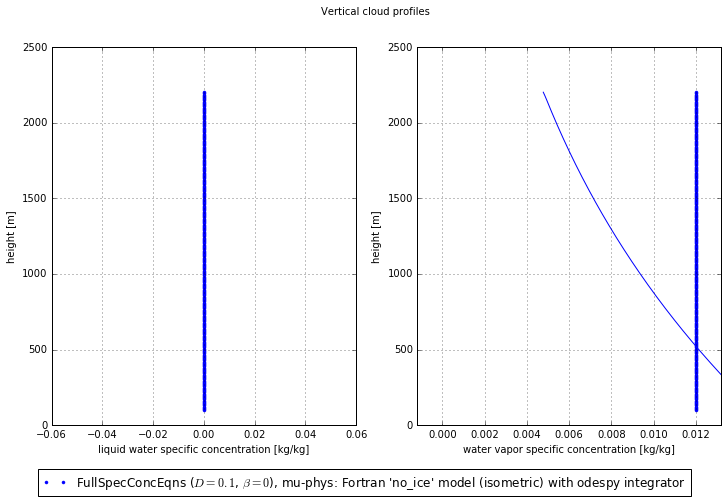

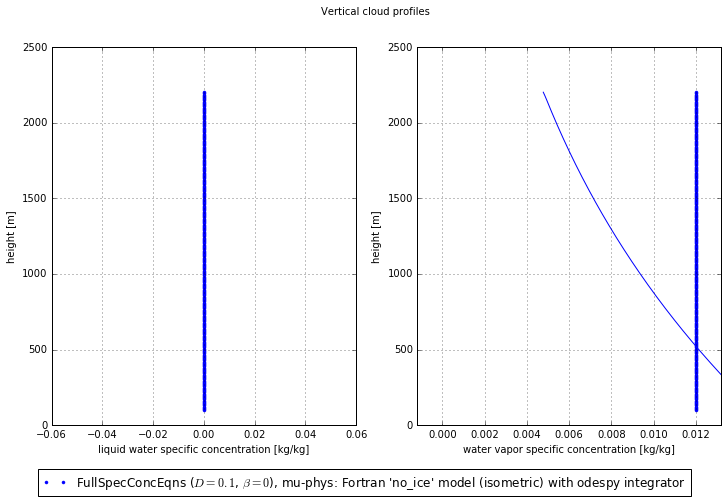

In [7]:
plotting.plot_profiles([profile,], ['q_l', 'q_v'])

In [7]:
print ambient_stratification.gas_properties.cp()


1004.6994545
